# Vegetable Price Prediction Using Machine Learning
Implemented for West Bengal, Kolkata district, Bara Bazar market (Commodity = Onion) 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
%matplotlib inline

# Reading Dataset
Vegetable Data is taken from https://agmarknet.gov.in

In [6]:
vegetables = pd.read_csv('Nagpur_Cotton.csv')
vegetables.head()

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,1,Nagpur,Bhiwapur,Cotton,Varalaxmi,FAQ,4900,5250,5000,26-Dec-19
1,2,Nagpur,Bhiwapur,Cotton,Varalaxmi,FAQ,4900,5300,5100,25-Dec-19
2,3,Nagpur,Bhiwapur,Cotton,Varalaxmi,FAQ,4900,5350,5100,15-Dec-19
3,4,Nagpur,Bhiwapur,Cotton,Varalaxmi,FAQ,5100,5360,5250,11-Dec-19
4,5,Nagpur,Bhiwapur,Cotton,Varalaxmi,FAQ,5000,5230,5115,04-Dec-19


# Data Selection

select District Name == Kolkata <br>
Select Market Name == Bara Bazar (Posta Bazar) <br>
Then Select Variety == Jyoti

In [7]:
vegetables = vegetables[vegetables['District Name'] == "Nagpur"]
vegetables = vegetables[vegetables['Market Name'] == "Bhiwapur"]
vegetables = vegetables[vegetables['Commodity'] == "Cotton"]
vegetables.head()

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,1,Nagpur,Bhiwapur,Cotton,Varalaxmi,FAQ,4900,5250,5000,26-Dec-19
1,2,Nagpur,Bhiwapur,Cotton,Varalaxmi,FAQ,4900,5300,5100,25-Dec-19
2,3,Nagpur,Bhiwapur,Cotton,Varalaxmi,FAQ,4900,5350,5100,15-Dec-19
3,4,Nagpur,Bhiwapur,Cotton,Varalaxmi,FAQ,5100,5360,5250,11-Dec-19
4,5,Nagpur,Bhiwapur,Cotton,Varalaxmi,FAQ,5000,5230,5115,04-Dec-19


In [8]:
vegetables['Price Date'] = pd.to_datetime(vegetables['Price Date'])
vegetables['Price Date'] = vegetables['Price Date'].dt.day
vegetables = vegetables.iloc[::-1]
vegetables.tail(10)

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
9,10,Nagpur,Bhiwapur,Cotton,Other,FAQ,6000,6400,6200,8
8,9,Nagpur,Bhiwapur,Cotton,Other,FAQ,6100,6100,6100,22
7,8,Nagpur,Bhiwapur,Cotton,Varalaxmi,FAQ,4775,4950,4900,21
6,7,Nagpur,Bhiwapur,Cotton,Varalaxmi,FAQ,4800,5160,4950,24
5,6,Nagpur,Bhiwapur,Cotton,Varalaxmi,FAQ,4900,5100,5000,27
4,5,Nagpur,Bhiwapur,Cotton,Varalaxmi,FAQ,5000,5230,5115,4
3,4,Nagpur,Bhiwapur,Cotton,Varalaxmi,FAQ,5100,5360,5250,11
2,3,Nagpur,Bhiwapur,Cotton,Varalaxmi,FAQ,4900,5350,5100,15
1,2,Nagpur,Bhiwapur,Cotton,Varalaxmi,FAQ,4900,5300,5100,25
0,1,Nagpur,Bhiwapur,Cotton,Varalaxmi,FAQ,4900,5250,5000,26


# Reading Climate Data
Weather Data is taken from https://www.wunderground.com/ 

In [9]:
climate = pd.read_csv('climate_Nagpur_200.csv')
vegetables.reset_index(inplace=True)
vegetables[['Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min','Pressure_Avg','Precipitation_Total']] = climate[['Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min', 'Pressure_Avg', 'Precipitation_Total']]
print(vegetables.head())
data = vegetables[['Price Date', 'Modal Price (Rs./Quintal)', 'Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min','Pressure_Avg', 'Precipitation_Total']] 
X = vegetables[['Price Date','Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min', 'Pressure_Avg', 'Precipitation_Total']]
y = vegetables[['Modal Price (Rs./Quintal)']]
print(X.shape)

   index  Sl no. District Name Market Name Commodity    Variety Grade  \
0     32      33        Nagpur    Bhiwapur    Cotton  Varalaxmi   FAQ   
1     31      32        Nagpur    Bhiwapur    Cotton  Varalaxmi   FAQ   
2     30      31        Nagpur    Bhiwapur    Cotton      Other   FAQ   
3     29      30        Nagpur    Bhiwapur    Cotton  Varalaxmi   FAQ   
4     28      29        Nagpur    Bhiwapur    Cotton      Other   FAQ   

   Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0                     5151                     5151   
1                     4800                     5380   
2                     5300                     5405   
3                     4800                     5200   
4                     5300                     5405   

   Modal Price (Rs./Quintal)  ...  Dew_Avg  Dew_Min  Humid_Max  Humid_Avg  \
0                       5151  ...  65.5075   60.585     88.515    69.8485   
1                       5250  ...  65.1050   60.145     88.125    69.3565   

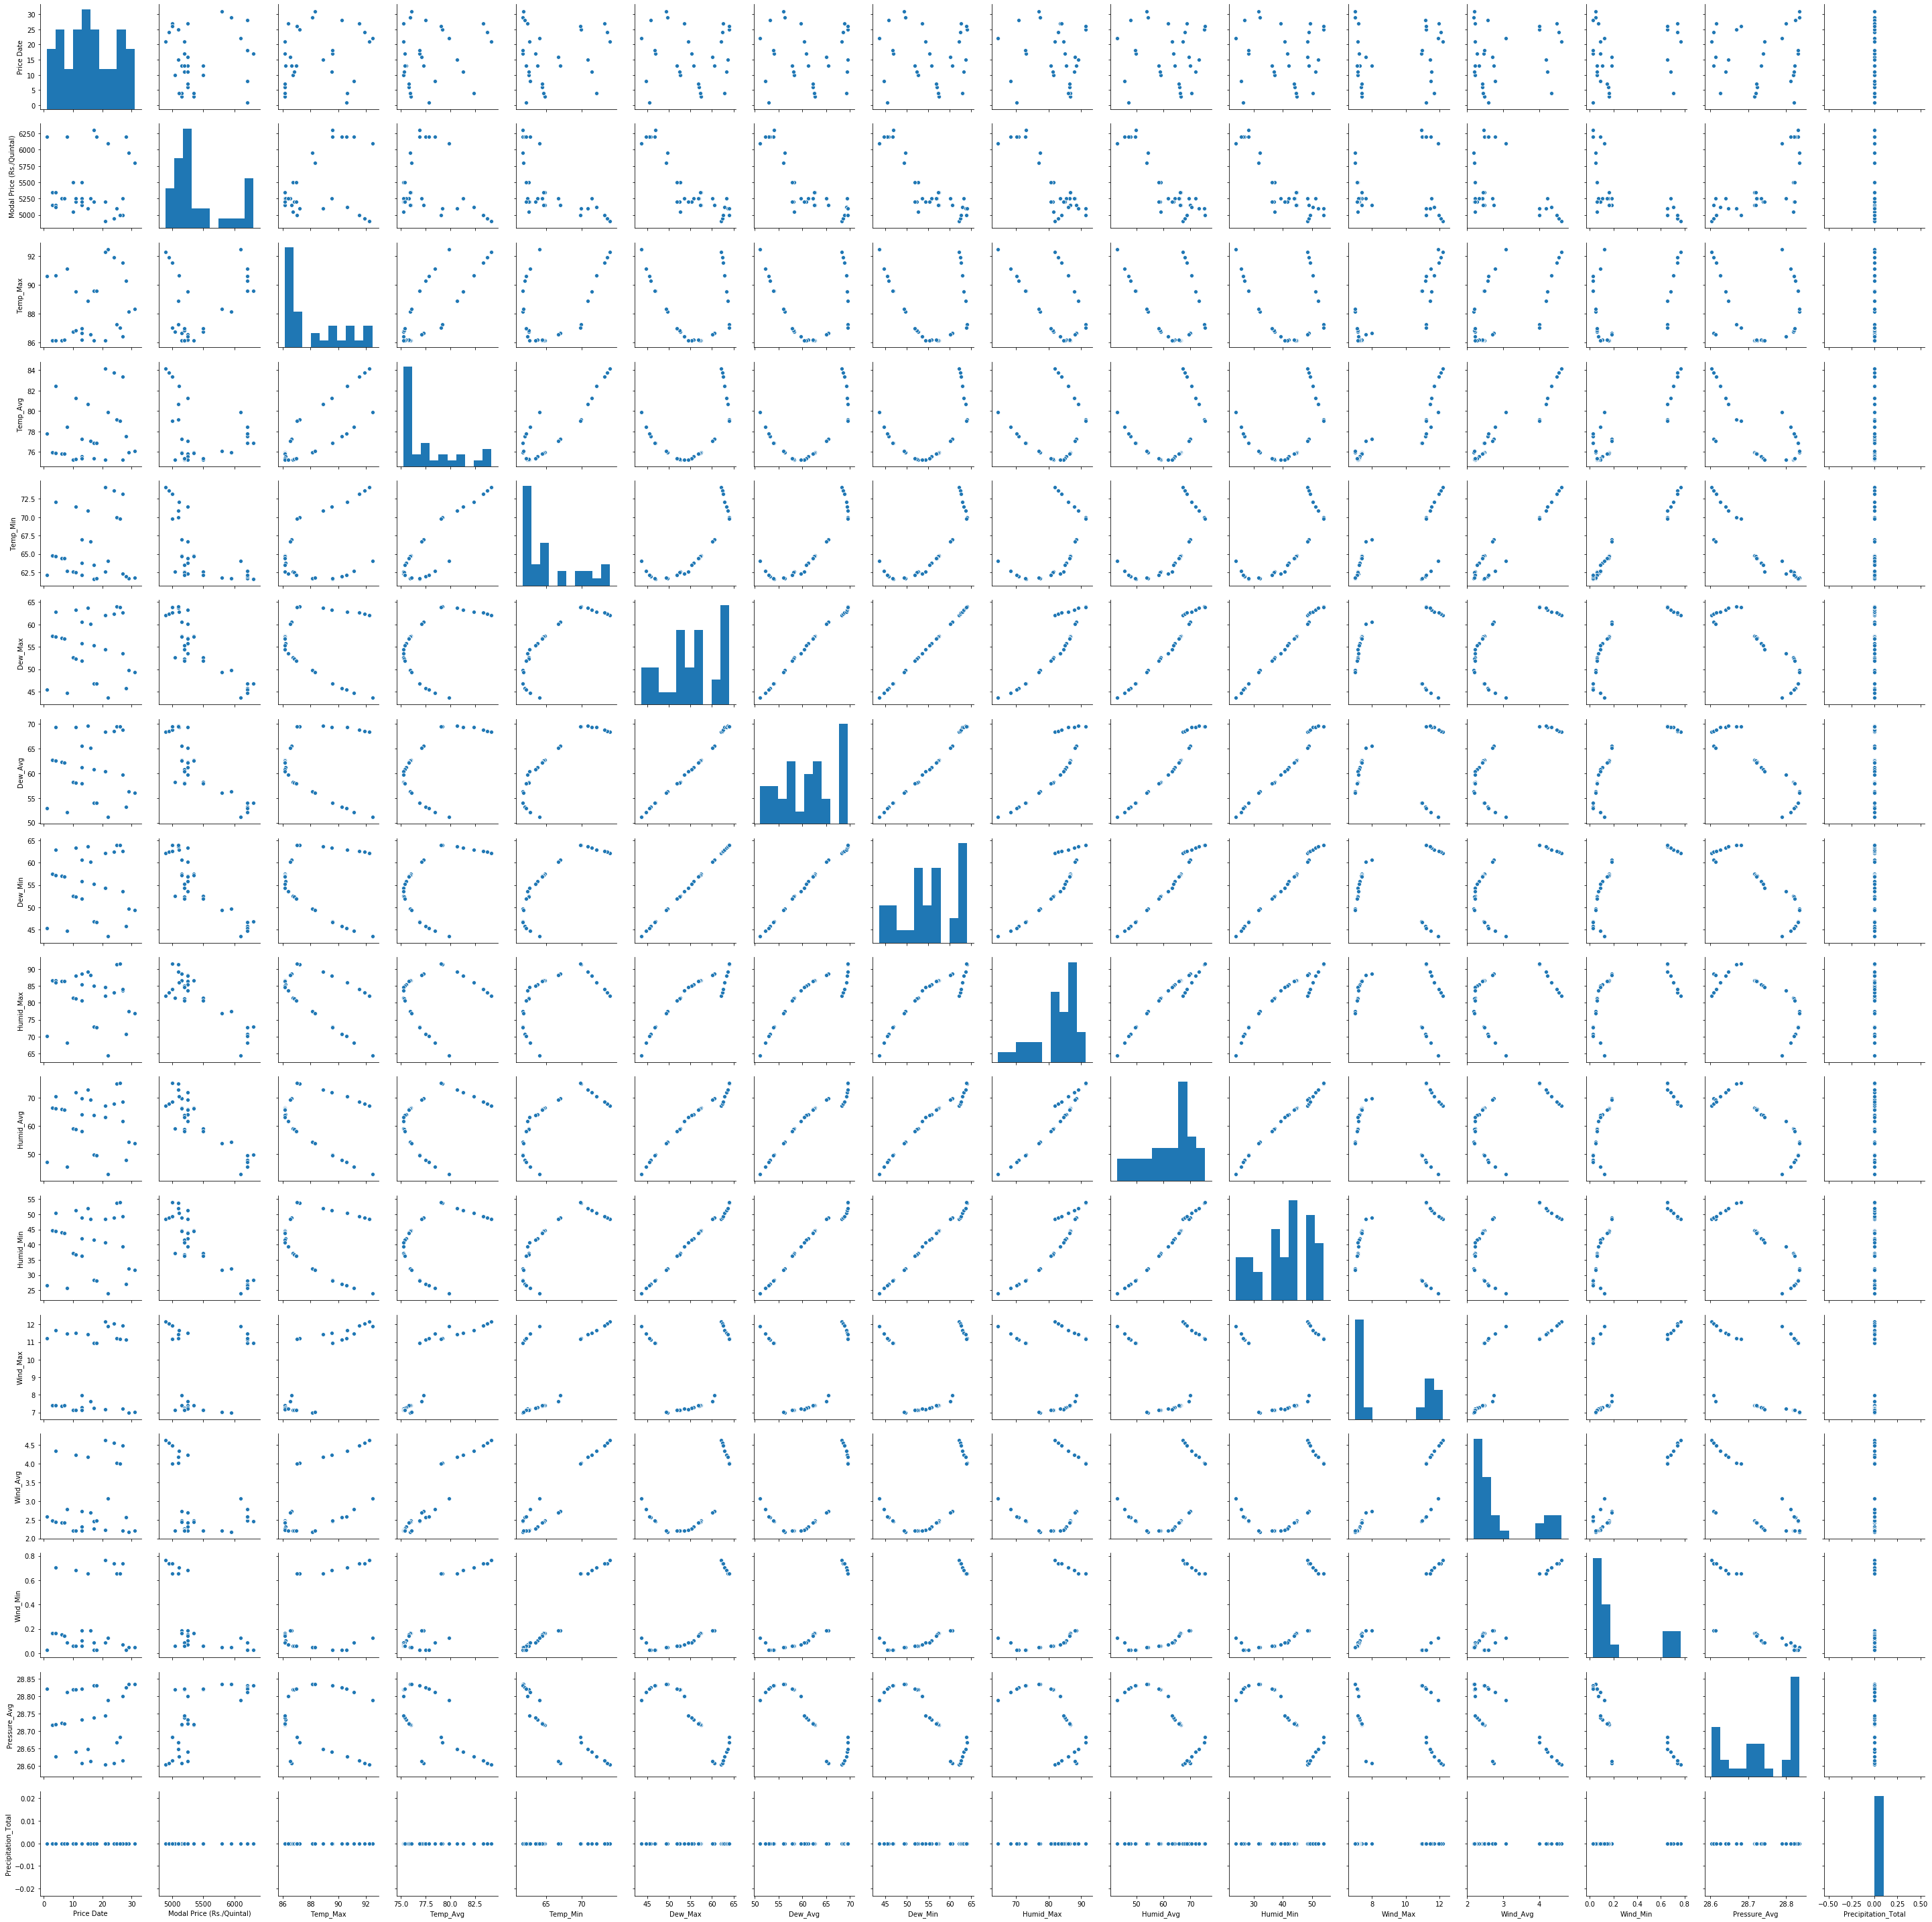

In [6]:
sns.pairplot(data)

# Data is splitted into train and test set.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import math

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X[:-1], y[:-1], test_size=0.3, random_state=42, shuffle = True)

# Implementation Of Algorithm 
Implementing Random Forest algorithm

In [12]:
start = time.time()
regr = RandomForestRegressor(n_estimators = 1000,max_depth=1000, random_state=20, criterion="mae", min_samples_split=2, oob_score = True)
regr.fit(X_train,np.reshape(np.array(y_train), (len(y_train), )))
end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 3.4864680767059326


In [13]:
predicted = regr.predict(X_test)

# Accuracy For Training and Testing Set

In [14]:
#print(y_test, predicted)
print(regr.score(X_train, y_train))
print(regr.score(X_test, y_test))

0.9855670373524943
0.7404510443574688


# Feature Importance

In [15]:
a = np.reshape(regr.feature_importances_, (len(regr.feature_importances_),1))
a = a.tolist()
col = X.columns
for i in range(0,15):
    print(col[i],  "->" , a[i][0])

Price Date -> 0.02861362742586206
Temp_Max -> 0.053797333457169055
Temp_Avg -> 0.02115418341224154
Temp_Min -> 0.04468944459393977
Dew_Max -> 0.11855142834952123
Dew_Avg -> 0.12728250032323832
Dew_Min -> 0.11503422323604702
Humid_Max -> 0.13408579514594876
Humid_Avg -> 0.12079284051803754
Humid_Min -> 0.13137883110488227
Wind_Max -> 0.02154390411700262
Wind_Avg -> 0.017462315624640304
Wind_Min -> 0.03997971583094806
Pressure_Avg -> 0.02563385686052157
Precipitation_Total -> 0.0


# predicted vs Actual

In [17]:
b= y_test.values
b = b.reshape((len(b),))
l = len(b)
sum_a = 0
for i in range(len(predicted)):
    print(str(predicted[i]) +"->"+ str(b[i]))
    sum_a = sum_a + abs(predicted[i] - b[i])

5108.685->5250
5207.44->5500
6085.01->6100
5686.615->5950
5236.04->5250
5233.825->5200
5114.105->5100
5003.115->4900
5113.265->5500
5162.725->5151


In [18]:
print(sum_a/l)

127.57149999999993


# Create picke file

In [19]:
import pickle
filename = 'Nagpur_Cotton'
outfile = open(filename,'wb')
pickle.dump(regr,outfile)
outfile.close()

In [20]:
filename = 'Nagpur_Cotton'
with open(filename, "rb") as f:
    rf = pickle.load(f)
predicted = rf.predict(X)
actual= np.reshape(np.array(y),(len(y),))
#print(predicted,actual)
sum = 0
for i in range(len(predicted)):
    #print(str(actual[i]) + "->" + str(predicted[i]))
    sum = sum +abs(actual[i] - predicted[i])
f.close()

# Total Error

In [21]:
print(sum/len(actual))

69.20166666666665
